In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataFrame = pd.read_csv("data_corelab2.csv")

In [4]:
def removePM(row):
    row = str(row)
    if(row[-1] == 'M'):
        return row
    return row + " PM"
dataFrame["Time"] = dataFrame["Time"].apply(removePM)

# Data Preprocessing

__Normalize Species__

According to a quick view at the dataset, we want to standardize the `Species` of the lizard. The following is the set of possible species in the dataset.

In [5]:
set(dataFrame['Species'])

{nan,
 'Western Skink',
 '?',
 'Western-Fence',
 'Juvenile Western Fence',
 'Whiptail/Fence',
 'Baby Fence',
 'Juvenile Side-Blotched',
 'whiptail',
 'Whiptail',
 'Alligator',
 'Juvenile Fence',
 'Small & fast lizard',
 'Side-Blotched or whiptail?',
 'Fence',
 'Side-Blotched',
 'Western Fence',
 'southern Alligator'}

In [6]:
# Use only Fence lizard and side-blotched 
dataFrame = dataFrame[dataFrame['Species'].notnull()]
dataFrame['StandardizedSpecies'] = np.nan

# Fence lizards
for name in ['Baby Fence', 'Fence', 'Juvenile Fence', \
             'Juvenile Western Fence', 'Western Fence', 'Western-Fence']:
    dataFrame.loc[dataFrame['Species'] == name, 'StandardizedSpecies'] = 'Fence'

# Side-blotched lizards
for name in ['Juvenile Side-Blotched', 'Side-Blotched']:
    dataFrame.loc[dataFrame['Species'] == name, 'StandardizedSpecies'] = 'Side-Blotched'
    
# Remove any other types of lizards
dataFrame = dataFrame.drop('Species', axis=1)
dataFrame = dataFrame[dataFrame['StandardizedSpecies'].notnull()]

__Normalize Time__


In [7]:
temp_hr = pd.to_datetime(dataFrame['Time']).dt.hour % 12 + 12
temp_min1 = (pd.to_datetime(dataFrame['Time']).dt.minute / 10).astype(int)
temp_min2 = pd.to_datetime(dataFrame['Time']).dt.minute % 10
temp_min = temp_min1.astype(str).str.cat(temp_min2.astype(str), sep="")
temp_combined = temp_hr.astype(str).str.cat(temp_min.astype(str), sep=':')
dataFrame['normalizedTime'] = temp_combined
dataFrame = dataFrame.drop('Time', axis=1)

__Normalize Sun conditions__

In [8]:
dataFrame['Sun conditions'] = dataFrame['Sun conditions'].str.capitalize()
dataFrame.loc[dataFrame['Sun conditions'] == 'Sun', 'Sun conditions'] = 'Sunny'
dataFrame['Normalized Sun conditions'] = np.nan

# Sunny
for name in ['Full sun', 'Partial sun', 'Sunny']:
    dataFrame.loc[dataFrame['Sun conditions'] == name, 'Normalized Sun conditions'] = 'Sun'

for name in ['Overcast']:
    dataFrame.loc[dataFrame['Sun conditions'] == name, 'Normalized Sun conditions'] = 'Overcast'
    
# Shade
for name in ['Partial shade', 'Shade']:
    dataFrame.loc[dataFrame['Sun conditions'] == name, 'Normalized Sun conditions'] = 'Shade'

dataFrame = dataFrame[dataFrame['Normalized Sun conditions'].notnull()]
set(dataFrame['Normalized Sun conditions'])

{'Overcast', 'Shade', 'Sun'}

In [9]:
dataFrame.columns[0:2].append(dataFrame.columns[4:7])

Index(['Names (observers)', 'Date', 'Substrate', 'Sun conditions',
       'Originally partial shade?'],
      dtype='object')

In [10]:
dataFrame = dataFrame.drop(dataFrame.columns[0:2].append(dataFrame.columns[4:7]), axis=1)
cols = [dataFrame.columns[3], 
        dataFrame.columns[2], 
        dataFrame.columns[0], 
        dataFrame.columns[1], 
        dataFrame.columns[4]]

In [11]:
dataFrame = dataFrame[cols]
dataFrame.columns = ['Time','Species','Temperature','Height','Condition']
dataFrame

,Time,Species,Temperature,Height,Condition
0,14:03,Fence,33.2,0.0,Overcast
1,15:15,Fence,30.2,2.0,Overcast
3,14:07,Fence,31.6,5.0,Overcast
4,13:53,Fence,37.4,0.0,Overcast
5,13:53,Fence,35.2,0.0,Overcast
6,14:03,Fence,36.2,0.0,Overcast
7,14:08,Fence,35.6,0.0,Overcast
8,14:50,Fence,31.2,19.0,Overcast
9,14:02,Fence,35.6,0.0,Overcast
10,14:50,Side-Blotched,31.6,0.0,Overcast


In [12]:
dataFrame.to_csv( "normalizedData.csv", index=False)

# Results

In [13]:
Total                = len(dataFrame)

FenceLizards         = dataFrame['Species'] == 'Fence'
SideBlotchedLizards  = dataFrame['Species'] == 'Side-Blotched'

SunCondition         = dataFrame['Condition'] == 'Sun'
ShadeCondition       = dataFrame['Condition'] == 'Shade'

In [14]:
FenceSun          = FenceLizards & SunCondition
FenceShade        = FenceLizards & ShadeCondition
SideBlotchedSun   = SideBlotchedLizards & SunCondition
SideBlotchedShade = SideBlotchedLizards & ShadeCondition

In [15]:
print("              | Sun  | Shade")
print("----------------------------")
print("Fence         | {}   | {}".format(np.sum(FenceSun),np.sum(FenceShade)))
print("Side-Blotched | {}  | {}".format(np.sum(SideBlotchedSun),np.sum(SideBlotchedShade)))

              | Sun  | Shade
----------------------------
Fence         | 58   | 92
Side-Blotched | 88  | 34


In [16]:
a = np.sum(FenceSun)
b = np.sum(FenceShade)
c = np.sum(SideBlotchedSun)
d = np.sum(SideBlotchedShade)
chi_square = ((a*d - b*c)**2)*(a+b+c+d)/((a+b)*(c+d)*(b+d)*(a+c))
print("Chi square statistic is {}".format(chi_square))

Chi square statistic is 30.301545334754408


__Pie Diagram of two Species__

This following diagram depicts the number of samples for each species (Fence lizards or Side-Blotched lizards).

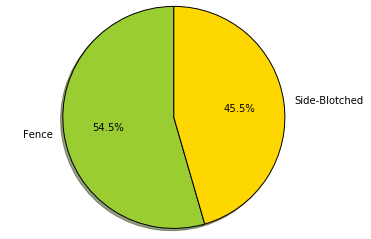

In [17]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Fence', 'Side-Blotched'
sizes = [np.sum(FenceLizards), np.sum(SideBlotchedLizards)]
colors = ['yellowgreen', 'gold']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig("Pie_chart.png")

This following diagram also includes the sun condition when the lizards were found, i.e., either the sun condition was sunny or in shade.

(-1.0815915909086542,
 1.1097734524272891,
 -1.0891353607083119,
 1.0923879532511287)

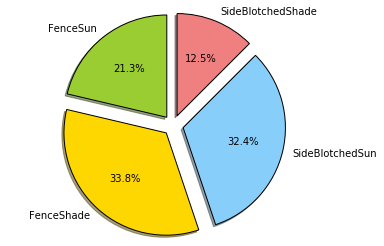

In [19]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'FenceSun', 'FenceShade', 'SideBlotchedSun', 'SideBlotchedShade'
sizes = [np.sum(FenceSun), np.sum(FenceShade), np.sum(SideBlotchedSun), np.sum(SideBlotchedShade)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

In [ ]:
dataFrame